# 30/9/2020 - Report data tracking invest.vcsc.com.vn 

In [1]:
# ------------- data analysis and wrangling-------------------
import pandas as pd
import numpy as np
import random as rnd
from pandas import DataFrame
import warnings
warnings.filterwarnings("ignore")
import shap
# ------------------------------------------------------------

# ------- import các tool visualization ----------------------
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# ------------------------------------------------------------

In [2]:
eda = pd.read_csv(r"C:\PYTHON LEARNING\DATA\eye tracking.csv")
eda = pd.DataFrame(eda)

In [3]:
eda

,Created,Recording URL,Publicly Shared,Already Watched,Favorited,Tags,Notes,Landing Page URL,Exit Page URL,Referrer URL,...,Duration (seconds),Rage Clicked,U-Turned,Incoming Feedback,Net Promoter Score®,Hotjar User ID,Country,Device,Browser,Operating System
0,2020-09-18T00:58:49,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://www.google.com/,...,14,False,False,NaN,NaN,0234ea49,VN,Phone,Chrome,Android
1,2020-09-21T03:32:02,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://www.google.com/,...,111,False,False,NaN,NaN,40a5b6b1,VN,Desktop,Chrome,Windows
2,2020-09-24T03:29:11,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://www.google.com/,...,392,False,False,NaN,NaN,528d63c8,VN,Desktop,Firefox,Windows
3,2020-09-15T05:22:17,https://insights.hotjar.com/r?site=1982311&rec...,False,True,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://www.google.com/,...,35,False,False,NaN,NaN,f9c7a757,VN,Phone,Chrome,Android
4,2020-09-24T04:35:46,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://www.google.com.vn,...,7,False,False,NaN,NaN,6c388d26,VN,Phone,Safari,Ios
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,2020-09-23T08:25:08,https://insights.hotjar.com/r?site=1982311&rec...,False,True,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://www.google.com/,...,17,False,False,NaN,NaN,418d0d42,VN,Phone,Chrome,Android
325,2020-09-23T07:52:11,https://insights.hotjar.com/r?site=1982311&rec...,False,True,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://www.google.com.vn/,...,68,False,False,NaN,NaN,f17f0bb1,VN,Phone,Uc,Ios
326,2020-09-23T07:21:02,https://insights.hotjar.com/r?site=1982311&rec...,False,True,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://www.google.com/,...,47,False,False,NaN,NaN,69d2853e,VN,Desktop,Chrome,Windows
327,2020-09-23T06:12:13,https://insights.hotjar.com/r?site=1982311&rec...,False,True,True,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://www.google.com/,...,374,False,False,NaN,NaN,337fd7b4,VN,Desktop,Chrome,Windows


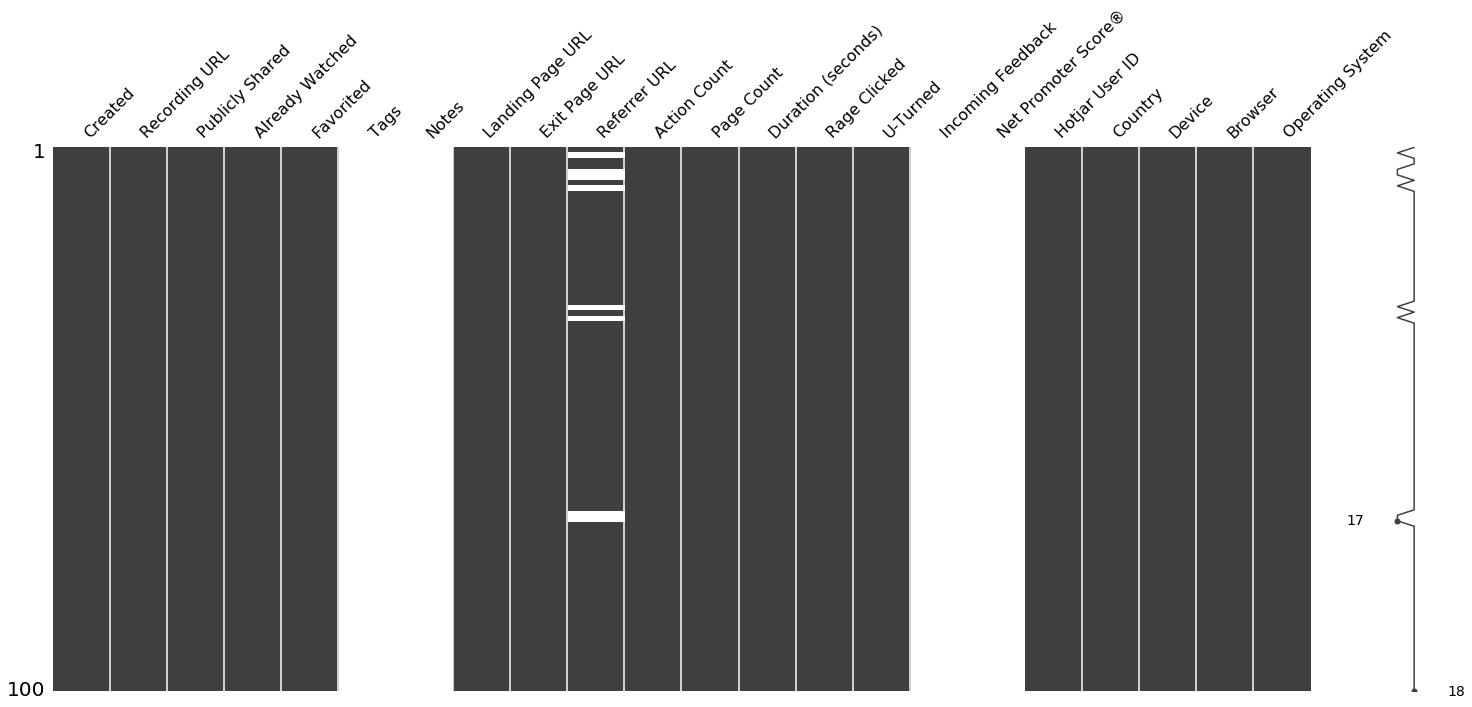

In [4]:
def timnan(eda):
    import missingno as msno
    import numpy as np
    collisions = eda.replace("nan", np.nan)
    msno.matrix(collisions.sample(100))
    plt.show()
timnan(eda)

In [5]:
target = 'Favorited'

Target looks like classification
Linear Discriminant Analysis training set score: 0.852


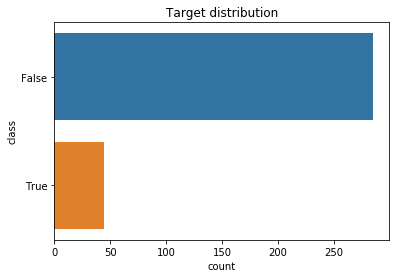

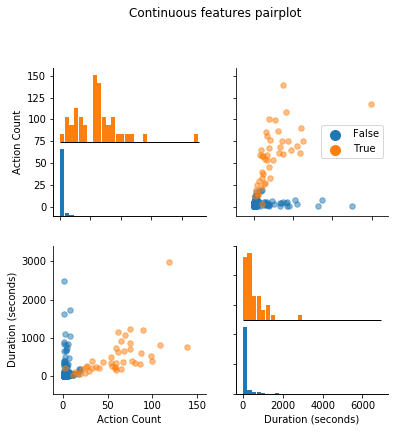

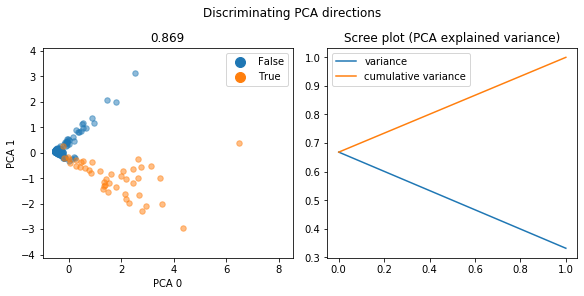

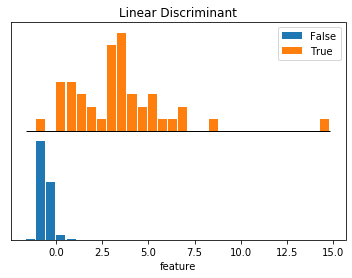

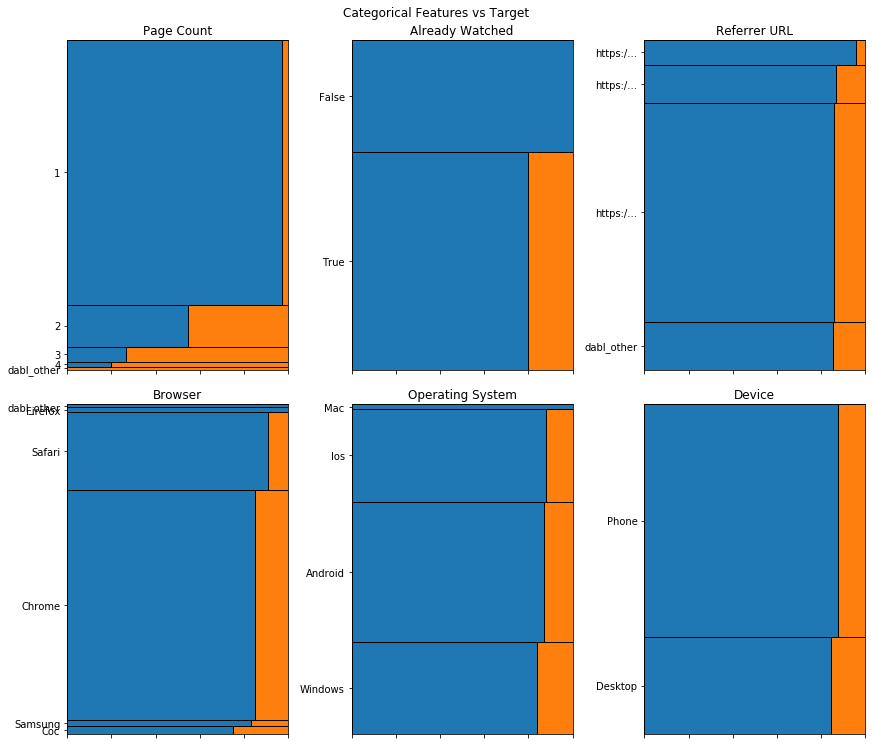

In [6]:
target = 'Favorited'
import cafechungkhoan
from cafechungkhoan import plot
from cafechungkhoan.datasets import load_ames
plot(eda, target)
plt.show()

## Fast EDA nhận thấy feature Page Count có giá trị với khách hàng

Các phần Browser, Operating system, Device không rõ ràng để đánh giá

## Dựa vào data record nhận thấy lượng khách fill gần hết form là count(True) so với thực tế

Cần loại bỏ các bước không cần thiết, cho khách tự fill và chuyển mail cho broker cả các khách không fill hết form

In [7]:
eda.groupby('Favorited').count()

,Created,Recording URL,Publicly Shared,Already Watched,Tags,Notes,Landing Page URL,Exit Page URL,Referrer URL,Action Count,...,Duration (seconds),Rage Clicked,U-Turned,Incoming Feedback,Net Promoter Score®,Hotjar User ID,Country,Device,Browser,Operating System
Favorited,,,,,,,,,,,,,,,,,,,,,
False,285,285,285,285,0,0,285,285,260,285,...,285,285,285,0,0,285,285,285,285,285
True,44,44,44,44,0,0,44,44,41,44,...,44,44,44,0,0,44,44,44,44,44


## Filter nhóm action count < 15 không remarketing

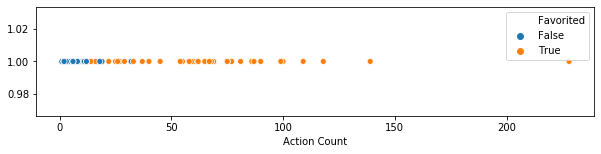

In [8]:
plt.figure(figsize = (10,2))
sns.scatterplot(data=eda, x="Action Count", y=1, hue="Favorited")

## Lượng click của khách đăng kí trên Phone nhiều hơn trên Destop

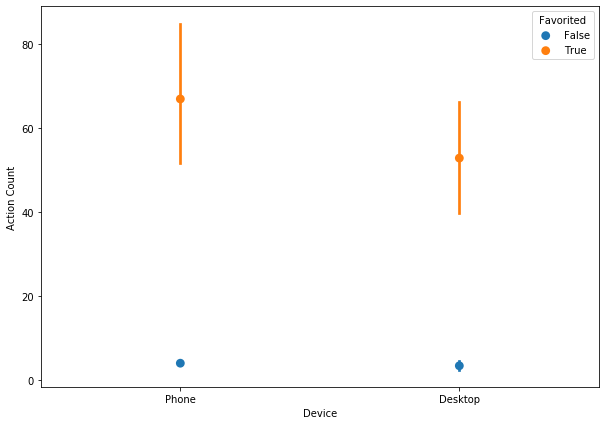

In [9]:
plt.figure(figsize = (10,7))
sns.pointplot(y="Action Count",x="Device", hue="Favorited",data=eda,join=False)

## Dữ liệu Page Scroll bị drop mạnh tại vị trí 30% độ dài page

In [10]:
page_scroll = pd.read_csv(r"C:\PYTHON LEARNING\DATA\invest vcsc page scroll.csv")
page_scroll = pd.DataFrame(page_scroll)

In [11]:
page_scroll['ofpagescrolled'] = page_scroll['% of page scrolled']

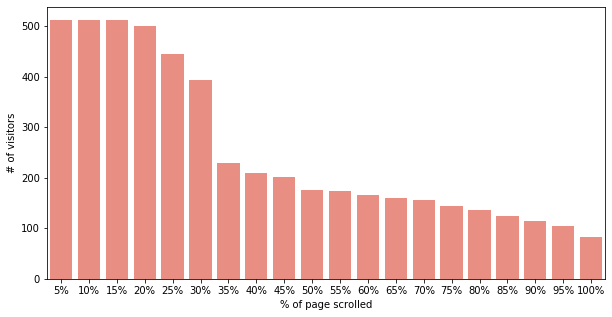

In [12]:
plt.figure(figsize = (10,5))
sns.barplot(data=page_scroll, x="% of page scrolled", y='# of visitors',order=page_scroll['% of page scrolled'],color="salmon")

## Lượng khách giảm 50% từ button mở tk ngay đến reCAPCHA

In [13]:
click_position = pd.read_csv(r"C:\PYTHON LEARNING\DATA\invest vcsc click position.csv",encoding= 'unicode_escape')
click_position = pd.DataFrame(click_position)
click_position.head(20)

,Element CSS selector,Total # of clicks,Visible,% of total,Unnamed: 4
0,div#_form>div.content>div.form>div.row>div.col...,76,No,5.87%,NaN
1,"*[name=""name""]",45,Yes,3.48%,NaN
2,div#_form>div.content>div.form>div.row>div.col...,40,Yes,3.09%,Button [M? TÀI KHO?N NGAY]
3,"*[name=""address""]",38,Yes,2.94%,NaN
4,div#_form>div.content>div.form>div.row>div.col...,35,No,2.70%,NaN
5,"*[name=""email""]",32,Yes,2.47%,NaN
6,"*[name=""id_number""]",28,No,2.16%,"click form ""s? CMND"""
7,"*[name=""phone""]",26,Yes,2.01%,NaN
8,"*[name=""brand""]",23,Yes,1.78%,NaN
9,div#myTopnav>nav>a.nav-item (1),22,Yes,1.70%,NaN
